In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

# Exploring the data

In [2]:
data=pd.read_csv('S:\Data sets\EVDatabase 2023.csv')

In [3]:
data.head() # checking the top 5 values to get the overview of data.

Name  \
0  Lucid Air Dream Edition P   
1     Porsche Taycan Turbo S   
2          Audi e-tron GT RS   
3      Renault Zoe ZE50 R110   
4          Audi Q4 e-tron 35   

                                            Subtitle Acceleration  TopSpeed  \
0  118 kWh useable battery          Available sin...      2.7 sec  270 km/h   
1  83.7 kWh useable battery          Available si...      2.8 sec  260 km/h   
2  85 kWh useable battery          Available sinc...      3.3 sec  250 km/h   
3  52 kWh useable battery          Available sinc...     11.4 sec  135 km/h   
4  52 kWh useable battery          Available sinc...      9.0 sec  160 km/h   

    Range Efficiency FastChargeSpeed              Drive  NumberofSeats  \
0  645 km  183 Wh/km        820 km/h    All Wheel Drive              5   
1  400 km  209 Wh/km        980 km/h    All Wheel Drive              4   
2  405 km  210 Wh/km       1000 km/h    All Wheel Drive              4   
3  315 km  165 Wh/km        230 km/h  Front Wheel Drive              5   
4  285 km  182 Wh/km        360 km/h   Rear Wheel Drive              5   

  PriceinGermany PriceinUK  
0       €218,000       NaN  
1       €189,668  £142,400  
2       €146,050  £115,000  
3        €36,840       NaN  
4            NaN       NaN

In [4]:
data.shape

(309, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             309 non-null    object
 1   Subtitle         309 non-null    object
 2   Acceleration     309 non-null    object
 3   TopSpeed         309 non-null    object
 4   Range            309 non-null    object
 5   Efficiency       309 non-null    object
 6   FastChargeSpeed  309 non-null    object
 7   Drive            309 non-null    object
 8   NumberofSeats    309 non-null    int64 
 9   PriceinGermany   282 non-null    object
 10  PriceinUK        198 non-null    object
dtypes: int64(1), object(10)
memory usage: 26.7+ KB


In [6]:
data.isna().sum() #counting the null values in each column

Name                 0
Subtitle             0
Acceleration         0
TopSpeed             0
Range                0
Efficiency           0
FastChargeSpeed      0
Drive                0
NumberofSeats        0
PriceinGermany      27
PriceinUK          111
dtype: int64

<Axes: >

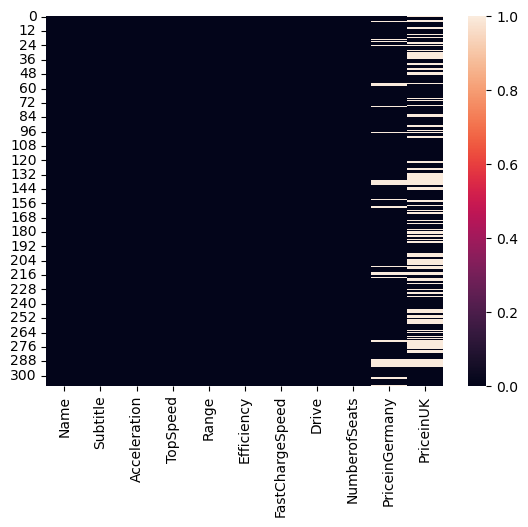

In [7]:
sns.heatmap(data.isna()) # visually checking the null vlues

In [8]:
# Observing the Name column we conclude that first word in the string is the name of the company followed by model name
# The brand valuse of the company also affects the marketprice

# Cleaning the data

### Creating a column for Brand

In [9]:
data.columns

Index(['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency',
       'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany',
       'PriceinUK'],
      dtype='object')

In [10]:
#creating a new dataframe 'df' to store Brand name 
df = pd.DataFrame({'Brand': data['Name'].str.split().str[0]}) #making dictionary to store values
df 

Brand
0         Lucid
1       Porsche
2          Audi
3       Renault
4          Audi
..          ...
304  Volkswagen
305  Volkswagen
306    Polestar
307    Polestar
308    Maserati

[309 rows x 1 columns]

### Understanding the content in 'Subtitle'

In [11]:
data.Subtitle.value_counts()

68 kWh useable battery          Available since February 2021       8
46.3 kWh useable battery          Available since November 2020     8
77 kWh useable battery          Available since March 2022          5
46.3 kWh useable battery          Available since November 2021     5
50.8 kWh useable battery          Expected from May 2023            4
                                                                   ..
49 kWh useable battery          Available since November 2021       1
107.8 kWh useable battery          Available since February 2022    1
40 kWh useable battery          Available since April 2022          1
74 kWh useable battery          Available since September 2021      1
95 kWh useable battery          Expected from September 2023        1
Name: Subtitle, Length: 187, dtype: int64

### Extracting the battery power data

In [12]:
# There are two set of sentences 
# 1st sentence is about battery 
# 2nd sentence is about availability of the battery in market

In [13]:
df['Batery_KWh']=data.Subtitle.str.split().str[0]
df['Batery_KWh'].head() # 'Batery_KWh' will have the value of battery power allocated to vehicle

0     118
1    83.7
2      85
3      52
4      52
Name: Batery_KWh, dtype: object

In [14]:
data.Subtitle.head() #Comparying the top 5 values for verification

0    118 kWh useable battery          Available sin...
1    83.7 kWh useable battery          Available si...
2    85 kWh useable battery          Available sinc...
3    52 kWh useable battery          Available sinc...
4    52 kWh useable battery          Available sinc...
Name: Subtitle, dtype: object

##### Understanding the term KWh

KWh stands for kilowatt hour, and it is a unit of energy. It is the amount of energy used by a device that consumes one kilowatt of power for one hour.
In the context of electric vehicles (EVs), kWh is used to measure the capacity of the battery and the energy consumption of the vehicle.
The battery capacity of an EV is the amount of energy that the battery can store. It is typically measured in kWh. The higher the battery capacity, the longer the EV can travel on a single charge.
The energy consumption of an EV is the amount of energy that the vehicle uses to travel a certain distance. It is typically measured in kWh/100km. The lower the energy consumption, the more efficient the EV is.

In [15]:
data.head(2)

Name  \
0  Lucid Air Dream Edition P   
1     Porsche Taycan Turbo S   

                                            Subtitle Acceleration  TopSpeed  \
0  118 kWh useable battery          Available sin...      2.7 sec  270 km/h   
1  83.7 kWh useable battery          Available si...      2.8 sec  260 km/h   

    Range Efficiency FastChargeSpeed            Drive  NumberofSeats  \
0  645 km  183 Wh/km        820 km/h  All Wheel Drive              5   
1  400 km  209 Wh/km        980 km/h  All Wheel Drive              4   

  PriceinGermany PriceinUK  
0       €218,000       NaN  
1       €189,668  £142,400

#### Removing the units from other columns

In [16]:
df['accln_sec']= data['Acceleration'].str.split().str[0]

In [17]:
df['TopSpeed_km/h']= data['TopSpeed'].str.split().str[0]

In [18]:
df['range_km']= data['Range'].str.split().str[0]

In [19]:
df['efficiency_wh/km']= data['Efficiency'].str.split().str[0]

In [20]:
df['ChargeSpeed_km/hr']= data['FastChargeSpeed'].str.split().str[0]

In [21]:
df['drive']= data['Drive']

In [22]:
df['NumberofSeats']= data['NumberofSeats']

In [23]:
df['PriceinGermany']= data['PriceinGermany'].str.replace('€','',regex=True)

In [24]:
df['PriceinGermany']= df['PriceinGermany'].str.replace(',','',regex=True)

In [25]:
df['PriceinUK']= data['PriceinUK'].str.replace('£','',regex=True)

In [26]:
df['PriceinUK']= df['PriceinUK'].str.replace(',','',regex=True)

#### Checking the new data frame 'df'

In [27]:
df.head()

Brand Batery_KWh accln_sec TopSpeed_km/h range_km efficiency_wh/km  \
0    Lucid        118       2.7           270      645              183   
1  Porsche       83.7       2.8           260      400              209   
2     Audi         85       3.3           250      405              210   
3  Renault         52      11.4           135      315              165   
4     Audi         52       9.0           160      285              182   

  ChargeSpeed_km/hr              drive  NumberofSeats PriceinGermany PriceinUK  
0               820    All Wheel Drive              5         218000       NaN  
1               980    All Wheel Drive              4         189668    142400  
2              1000    All Wheel Drive              4         146050    115000  
3               230  Front Wheel Drive              5          36840       NaN  
4               360   Rear Wheel Drive              5            NaN       NaN

In [28]:
df.shape

(309, 11)

In [29]:
df.info() # checking the dtypes of data frame df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              309 non-null    object
 1   Batery_KWh         309 non-null    object
 2   accln_sec          309 non-null    object
 3   TopSpeed_km/h      309 non-null    object
 4   range_km           309 non-null    object
 5   efficiency_wh/km   309 non-null    object
 6   ChargeSpeed_km/hr  309 non-null    object
 7   drive              309 non-null    object
 8   NumberofSeats      309 non-null    int64 
 9   PriceinGermany     282 non-null    object
 10  PriceinUK          198 non-null    object
dtypes: int64(1), object(10)
memory usage: 26.7+ KB


In [30]:
#The columns 'PriceinGermany' and 'PriceinUK' should be intiger. 

In [31]:
# the blank spaces or null values have to be filled first before changing data types.
# filling the '0' in place null values 
df['PriceinUK'] = df['PriceinUK'].fillna(0) 
df['PriceinGermany']= df['PriceinGermany'].fillna(0)
# Changing the datatype from object to int
df['PriceinUK']= df['PriceinUK'].astype(int)
df['PriceinGermany']= df['PriceinGermany'].astype(int)

In [32]:
#changine the data types of remaining columns
df['Batery_KWh'] = df['Batery_KWh'].astype(float) #this columns have values in decimal so we will uconvert to float
df['accln_sec'] = df['accln_sec'].astype(float) #this columns have values in decimal so we will uconvert to float
df['range_km'] = df['range_km'].astype(int)
df['efficiency_wh/km'] = df['efficiency_wh/km'].astype(int)
df['TopSpeed_km/h'] = df['TopSpeed_km/h'].astype(int)

In [33]:
df['ChargeSpeed_km/hr'].unique() # there is '-' value which needs to be fixed for changing the data type

array(['820', '980', '1000', '230', '360', '640', '1050', '1020', '-',
       '180', '970', '1130', '310', '150', '730', '380', '440', '530',
       '500', '540', '390', '370', '430', '520', '840', '960', '290',
       '280', '1010', '1170', '790', '770', '650', '630', '260', '160',
       '1030', '220', '950', '480', '680', '330', '720', '750', '1070',
       '900', '510', '490', '470', '460', '570', '670', '320', '400',
       '780', '410', '190', '560', '1110', '420', '300', '710', '930',
       '1090', '910', '1060', '450', '990', '170', '240', '760', '210',
       '870', '920', '880', '340', '1240', '1150', '860', '580', '350',
       '200', '610', '700', '940', '600', '590', '550', '620', '850',
       '800'], dtype=object)

In [34]:
df['ChargeSpeed_km/hr'] = df['ChargeSpeed_km/hr'].str.replace('-', '').str[0].fillna(0).astype(int)
# temporarily changing '-' with 0

In [35]:
df.dtypes # checking the datatypes

Brand                 object
Batery_KWh           float64
accln_sec            float64
TopSpeed_km/h          int32
range_km               int32
efficiency_wh/km       int32
ChargeSpeed_km/hr      int32
drive                 object
NumberofSeats          int64
PriceinGermany         int32
PriceinUK              int32
dtype: object

In [36]:
df.head()

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
0    Lucid       118.0        2.7            270       645               183   
1  Porsche        83.7        2.8            260       400               209   
2     Audi        85.0        3.3            250       405               210   
3  Renault        52.0       11.4            135       315               165   
4     Audi        52.0        9.0            160       285               182   

   ChargeSpeed_km/hr              drive  NumberofSeats  PriceinGermany  \
0                  8    All Wheel Drive              5          218000   
1                  9    All Wheel Drive              4          189668   
2                  1    All Wheel Drive              4          146050   
3                  2  Front Wheel Drive              5           36840   
4                  3   Rear Wheel Drive              5               0   

   PriceinUK  
0          0  
1     142400  
2     115000  
3          0  
4          0

In [37]:
df[df['ChargeSpeed_km/hr']==0]

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
9     Smart        16.7       11.6            130       100               167   
10    Smart        16.7       11.9            130        95               176   
17  Renault        21.3       12.6            135       130               164   

    ChargeSpeed_km/hr             drive  NumberofSeats  PriceinGermany  \
9                   0  Rear Wheel Drive              2           21940   
10                  0  Rear Wheel Drive              2           25200   
17                  0  Rear Wheel Drive              4           28000   

    PriceinUK  
9           0  
10          0  
17          0

In [38]:
df['ChargeSpeed_km/hr']=df.groupby('Brand')['ChargeSpeed_km/hr'].transform(lambda x:x.replace(0,x.mean()))

In [39]:
df[df['ChargeSpeed_km/hr']==0] # Null values fixed with mean

Empty DataFrame
Columns: [Brand, Batery_KWh, accln_sec, TopSpeed_km/h, range_km, efficiency_wh/km, ChargeSpeed_km/hr, drive, NumberofSeats, PriceinGermany, PriceinUK]
Index: []

#### Checking and counting the unique fields in dataframe

In [40]:
df.Brand.unique()

array(['Lucid', 'Porsche', 'Audi', 'Renault', 'Tesla', 'Smart', 'Honda',
       'Mercedes', 'Lexus', 'BMW', 'Fiat', 'Skoda', 'Nissan',
       'Volkswagen', 'Citroen', 'Opel', 'Peugeot', 'Mini', 'JAC',
       'Hyundai', 'Kia', 'MG', 'Toyota', 'CUPRA', 'Subaru', 'SsangYong',
       'Genesis', 'Aiways', 'Mazda', 'Dacia', 'Fisker', 'Hongqi', 'NIO',
       'Ford', 'Polestar', 'Rolls-Royce', 'Lotus', 'Volvo', 'ORA', 'BYD',
       'Abarth', 'DS', 'Jeep', 'Maserati', 'Seres', 'VinFast', 'Jaguar',
       'XPENG', 'Maxus'], dtype=object)

In [41]:
df.Brand.nunique() #counting total brands

49

In [42]:
df.Brand.value_counts()

Mercedes       38
Porsche        18
Audi           16
Peugeot        15
Volkswagen     15
Opel           14
Citroen        12
BMW            10
Tesla          10
Toyota         10
Hyundai        10
Fiat           10
Kia             9
Skoda           8
Polestar        8
Volvo           8
MG              8
Renault         7
Nissan          6
NIO             6
XPENG           6
VinFast         6
Genesis         5
Ford            5
Lucid           5
Fisker          4
Smart           4
CUPRA           3
ORA             3
BYD             3
Aiways          2
Dacia           2
Hongqi          2
Mini            2
Lexus           2
Maserati        2
Lotus           2
Jeep            2
DS              1
Seres           1
Jaguar          1
Subaru          1
Abarth          1
Rolls-Royce     1
Mazda           1
SsangYong       1
JAC             1
Honda           1
Maxus           1
Name: Brand, dtype: int64

In [43]:
df.drive.nunique()

3

In [44]:
df.drive.value_counts()

All Wheel Drive      128
Front Wheel Drive    115
Rear Wheel Drive      66
Name: drive, dtype: int64

In [45]:
df.NumberofSeats.nunique()

4

In [46]:
df.NumberofSeats.value_counts()

5    203
7     66
4     38
2      2
Name: NumberofSeats, dtype: int64

In [47]:
# Checking if there is a difference between 'PriceinGermany' and 'PriceinUK' because of difference in currency value wrt dollar 

In [48]:
(df.PriceinGermany - df.PriceinUK).value_counts()

 0         18
 5000       6
 12990      4
 7000       3
 7495       3
           ..
 209        1
 28214      1
 28166      1
 1780       1
-135000     1
Length: 263, dtype: int64

The price differences are not due to difference between the strengths of curriencies.

In [49]:
df.describe().T # analysing the values

count          mean           std    min      25%      50%  \
Batery_KWh         309.0     71.076052     21.139409   16.7     56.0     74.0   
accln_sec          309.0      7.532039      3.127109    2.1      4.9      7.0   
TopSpeed_km/h      309.0    180.754045     38.738187  125.0    150.0    180.0   
range_km           309.0    361.440129    110.861212   95.0    275.0    370.0   
efficiency_wh/km   309.0    199.430421     33.021626  150.0    174.0    192.0   
ChargeSpeed_km/hr  309.0      4.295192      2.249713    1.0      2.0      4.0   
NumberofSeats      309.0      5.284790      0.978567    2.0      5.0      5.0   
PriceinGermany     309.0  64832.462783  44638.555529    0.0  42000.0  56942.0   
PriceinUK          309.0  41173.233010  43035.103703    0.0      0.0  37000.0   

                       75%       max  
Batery_KWh            85.0     123.0  
accln_sec              9.0      19.1  
TopSpeed_km/h        200.0     320.0  
range_km             440.0     685.0  
efficiency_wh/km     214.0     295.0  
ChargeSpeed_km/hr      6.0       9.0  
NumberofSeats          5.0       7.0  
PriceinGermany     72519.0  400000.0  
PriceinUK          57990.0  350000.0

The min value is represented by 0 bcz we changed the NaN values to 0 in above operations. We will have to replace 0 with mean values. 

#### Fixing the null value 

In [50]:
# 
df['PriceinGermany']=df.groupby('Brand')['PriceinGermany'].transform(lambda x:x.replace(0,x.mean()))

In [51]:
(df['PriceinGermany']==0).sum() # earlier there were 27 Null values

11

In [52]:
df['PriceinUK']=df.groupby('Brand')['PriceinUK'].transform(lambda x:x.replace(0,x.mean()))

In [53]:
(df['PriceinUK']==0).sum() # earlier there were 111 Null values

32

In [54]:
df[df['PriceinGermany']==0].head(11) # this data can be used for prediction

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
56      JAC        39.0       12.0            132       225               173   
214  Hongqi        76.5        6.5            200       305               251   
215  Hongqi        90.0        4.9            200       355               254   
271   Seres        51.0        8.9            155       260               196   
287   XPENG        82.7        6.7            200       500               165   
288   XPENG        82.7        4.1            200       470               176   
289   XPENG        82.7        4.1            200       465               178   
290   XPENG        75.0        6.4            200       375               200   
291   XPENG        94.0        6.4            200       470               200   
292   XPENG        94.0        3.9            200       440               214   
302   Maxus        90.0        9.2            180       345               261   

     ChargeSpeed_km/hr              drive  NumberofSeats  PriceinGermany  \
56                 1.0  Front Wheel Drive              5             0.0   
214                4.0    All Wheel Drive              5             0.0   
215                4.0    All Wheel Drive              5             0.0   
271                2.0  Front Wheel Drive              5             0.0   
287                7.0   Rear Wheel Drive              5             0.0   
288                6.0    All Wheel Drive              5             0.0   
289                6.0    All Wheel Drive              5             0.0   
290                7.0   Rear Wheel Drive              5             0.0   
291                9.0   Rear Wheel Drive              5             0.0   
292                9.0    All Wheel Drive              5             0.0   
302                2.0  Front Wheel Drive              7             0.0   

     PriceinUK  
56         0.0  
214        0.0  
215        0.0  
271        0.0  
287        0.0  
288        0.0  
289        0.0  
290        0.0  
291        0.0  
292        0.0  
302    64306.0

In [55]:
case1=df[df['PriceinGermany']==0]

In [56]:
case1.shape

(11, 11)

In [57]:
case1.head()

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
56      JAC        39.0       12.0            132       225               173   
214  Hongqi        76.5        6.5            200       305               251   
215  Hongqi        90.0        4.9            200       355               254   
271   Seres        51.0        8.9            155       260               196   
287   XPENG        82.7        6.7            200       500               165   

     ChargeSpeed_km/hr              drive  NumberofSeats  PriceinGermany  \
56                 1.0  Front Wheel Drive              5             0.0   
214                4.0    All Wheel Drive              5             0.0   
215                4.0    All Wheel Drive              5             0.0   
271                2.0  Front Wheel Drive              5             0.0   
287                7.0   Rear Wheel Drive              5             0.0   

     PriceinUK  
56         0.0  
214        0.0  
215        0.0  
271        0.0  
287        0.0

In [58]:
df = df[df['PriceinGermany'] != 0] # Removal of null values 

In [59]:
case2=df[df['PriceinUK']==0] 

In [60]:
case2.shape

(22, 11)

In [61]:
case2.head() #will be used for prediction

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  \
0        Lucid       118.0        2.7            270       645   
31       Lucid       112.0        3.2            270       665   
32       Lucid        88.0        3.4            250       550   
33       Lucid        88.0        4.2            200       560   
122  SsangYong        56.0        8.5            156       290   

     efficiency_wh/km  ChargeSpeed_km/hr              drive  NumberofSeats  \
0                 183                8.0    All Wheel Drive              5   
31                168                8.0    All Wheel Drive              5   
32                160                9.0    All Wheel Drive              5   
33                157                9.0   Rear Wheel Drive              5   
122               193                3.0  Front Wheel Drive              5   

     PriceinGermany  PriceinUK  
0          218000.0        0.0  
31         174500.0        0.0  
32         120000.0        0.0  
33         100000.0        0.0  
122         40490.0        0.0

In [62]:
df = df[df['PriceinUK'] != 0]# Removal of null values 

In [63]:
df.shape

(276, 11)

#### Insights of the extremes of each column

In [64]:
# Most and least luxurious cars based on 'PriceinGermany'
most_luxurious = df.sort_values(by='PriceinGermany', ascending=False).head(1)
most_affordable = df.sort_values(by='PriceinGermany').head(1)

In [65]:
most_luxurious

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  \
233  Rolls-Royce       100.0        4.5            250       455   

     efficiency_wh/km  ChargeSpeed_km/hr            drive  NumberofSeats  \
233               220                5.0  All Wheel Drive              4   

     PriceinGermany  PriceinUK  
233        400000.0   350000.0

In [66]:
most_affordable

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
9  Smart        16.7       11.6            130       100               167   

   ChargeSpeed_km/hr             drive  NumberofSeats  PriceinGermany  \
9               2.25  Rear Wheel Drive              2         21940.0   

   PriceinUK  
9    19250.0

In [67]:
# Most and least powerful battery cars based on 'Batery_KWh'
most_powerful_battery = df.sort_values(by='Batery_KWh', ascending=False).head(1)
least_powerful_battery = df.sort_values(by='Batery_KWh').head(1)

In [68]:
most_powerful_battery

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  \
175  Mercedes       108.4        4.6            210       485   

     efficiency_wh/km  ChargeSpeed_km/hr            drive  NumberofSeats  \
175               224                6.0  All Wheel Drive              7   

     PriceinGermany  PriceinUK  
175        135434.0   139170.0

In [69]:
least_powerful_battery

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
9  Smart        16.7       11.6            130       100               167   

   ChargeSpeed_km/hr             drive  NumberofSeats  PriceinGermany  \
9               2.25  Rear Wheel Drive              2         21940.0   

   PriceinUK  
9    19250.0

In [70]:
# Fastest and slowest acceleration cars based on 'accln_sec'
fastest_acceleration = df.sort_values(by='accln_sec').head(1)
slowest_acceleration = df.sort_values(by='accln_sec', ascending=False).head(1)

In [71]:
fastest_acceleration

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
52  Tesla        95.0        2.1            282       550               173   

    ChargeSpeed_km/hr            drive  NumberofSeats  PriceinGermany  \
52                7.0  All Wheel Drive              5        137990.0   

    PriceinUK  
52   125000.0

In [72]:
slowest_acceleration

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
48  Peugeot        68.0       14.3            130       260               262   

    ChargeSpeed_km/hr              drive  NumberofSeats  PriceinGermany  \
48                2.0  Front Wheel Drive              7         60430.0   

       PriceinUK  
48  23311.666667

In [73]:
# Fastest and slowest cars based on 'TopSpeed_km/h'
fastest_car = df.sort_values(by='TopSpeed_km/h').head(1)
slowest_car = df.sort_values(by='TopSpeed_km/h', ascending=False).head(1)

In [74]:
fastest_car

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  \
127  Citroen        68.0       13.3            130       265   

     efficiency_wh/km  ChargeSpeed_km/hr              drive  NumberofSeats  \
127               257                2.0  Front Wheel Drive              7   

     PriceinGermany  PriceinUK  
127         57940.0   21883.75

In [75]:
slowest_car

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  \
270  Maserati        83.0        2.7            320       425   

     efficiency_wh/km  ChargeSpeed_km/hr            drive  NumberofSeats  \
270               195                9.0  All Wheel Drive              4   

     PriceinGermany  PriceinUK  
270        250000.0   200000.0

In [76]:
# Cars with the longest and shortest range based on 'range_km'
longest_range = df.sort_values(by='range_km', ascending=False).head(1)
shortest_range = df.sort_values(by='range_km').head(1)

In [77]:
longest_range

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  \
73  Mercedes       107.8        6.2            210       640   

    efficiency_wh/km  ChargeSpeed_km/hr             drive  NumberofSeats  \
73               168                9.0  Rear Wheel Drive              5   

    PriceinGermany  PriceinUK  
73        109551.0   105610.0

In [78]:
shortest_range

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
10  Smart        16.7       11.9            130        95               176   

    ChargeSpeed_km/hr             drive  NumberofSeats  PriceinGermany  \
10               2.25  Rear Wheel Drive              2         25200.0   

    PriceinUK  
10    19250.0

In [79]:
# Cars with the highest and lowest efficiency based on 'efficiency_wh/km'
highest_efficiency = df.sort_values(by='efficiency_wh/km').head(1)
lowest_efficiency = df.sort_values(by='efficiency_wh/km', ascending=False).head(1)

In [80]:
highest_efficiency

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  \
200  Hyundai        54.0        8.8            185       360   

     efficiency_wh/km  ChargeSpeed_km/hr             drive  NumberofSeats  \
200               150                8.0  Rear Wheel Drive              5   

     PriceinGermany  PriceinUK  
200         43900.0    38214.0

In [81]:
lowest_efficiency

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  \
30  Mercedes        90.0       12.1            160       305   

    efficiency_wh/km  ChargeSpeed_km/hr              drive  NumberofSeats  \
30               295                3.0  Front Wheel Drive              7   

    PriceinGermany     PriceinUK  
30         72519.0  44560.078947

In [82]:
# Cars with the fastest and slowest charge speed based on 'ChargeSpeed_km/hr'
fastest_charge_speed = df.sort_values(by='ChargeSpeed_km/hr').head(1)
slowest_charge_speed = df.sort_values(by='ChargeSpeed_km/hr', ascending=False).head(1)

In [83]:
fastest_charge_speed

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
49  Porsche        71.0        5.4            230       410               173   

    ChargeSpeed_km/hr             drive  NumberofSeats  PriceinGermany  \
49                1.0  Rear Wheel Drive              4         88399.0   

    PriceinUK  
49    75500.0

In [84]:
slowest_charge_speed

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
1  Porsche        83.7        2.8            260       400               209   

   ChargeSpeed_km/hr            drive  NumberofSeats  PriceinGermany  \
1                9.0  All Wheel Drive              4        189668.0   

   PriceinUK  
1   142400.0

In [85]:
# Cars with the most and least number of seats based on 'NumberofSeats'
most_seats = df.sort_values(by='NumberofSeats', ascending=False).head(10)
least_seats = df.sort_values(by='NumberofSeats').head(2)

In [86]:
most_seats

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  \
144  Mercedes        60.0       12.0            160       205   
126   Citroen        46.3       12.1            130       180   
110  Mercedes        66.5        8.0            160       335   
105   Citroen        46.3       11.7            135       200   
204      Fiat        46.3       12.1            130       185   
103      Opel        46.3       11.7            135       200   
102      Opel        46.3       11.7            135       205   
101  Mercedes        60.0       12.0            160       205   
100  Mercedes        60.0       12.0            160       205   
205      Fiat        68.0       13.3            130       265   

     efficiency_wh/km  ChargeSpeed_km/hr              drive  NumberofSeats  \
144               293                3.0  Front Wheel Drive              7   
126               257                2.0  Front Wheel Drive              7   
110               199                4.0    All Wheel Drive              7   
105               232                3.0  Front Wheel Drive              7   
204               250                2.0  Front Wheel Drive              7   
103               232                3.0  Front Wheel Drive              7   
102               226                3.0  Front Wheel Drive              7   
101               293                1.0  Front Wheel Drive              7   
100               293                1.0  Front Wheel Drive              7   
205               257                2.0  Front Wheel Drive              7   

     PriceinGermany     PriceinUK  
144         61571.0  44560.078947  
126         52730.0  35995.000000  
110         55519.0  55310.000000  
105         43640.0  32495.000000  
204         55990.0   6429.000000  
103         44750.0  34635.000000  
102         43050.0  34035.000000  
101         68949.0  44560.078947  
100         68056.0  44560.078947  
205         61990.0   6429.000000

In [87]:
least_seats

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
9   Smart        16.7       11.6            130       100               167   
10  Smart        16.7       11.9            130        95               176   

    ChargeSpeed_km/hr             drive  NumberofSeats  PriceinGermany  \
9                2.25  Rear Wheel Drive              2         21940.0   
10               2.25  Rear Wheel Drive              2         25200.0   

    PriceinUK  
9     19250.0  
10    19250.0

In [88]:
# Most and least expensive cars in the UK based on 'PriceinUK'
most_expensive_uk = df.sort_values(by='PriceinUK', ascending=False).head(1)
least_expensive_uk = df.sort_values(by='PriceinUK').head(1)

In [89]:
most_expensive_uk

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  \
233  Rolls-Royce       100.0        4.5            250       455   

     efficiency_wh/km  ChargeSpeed_km/hr            drive  NumberofSeats  \
233               220                5.0  All Wheel Drive              4   

     PriceinGermany  PriceinUK  
233        400000.0   350000.0

In [90]:
least_expensive_uk

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
207  Fiat        68.0       13.3            130       260               262   

     ChargeSpeed_km/hr              drive  NumberofSeats  PriceinGermany  \
207                2.0  Front Wheel Drive              7         62990.0   

     PriceinUK  
207     6429.0

# Exploratory Data Analysis
### Vidualising the Data

C:\Users\prati\AppData\Local\Temp\ipykernel_13788\249308572.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

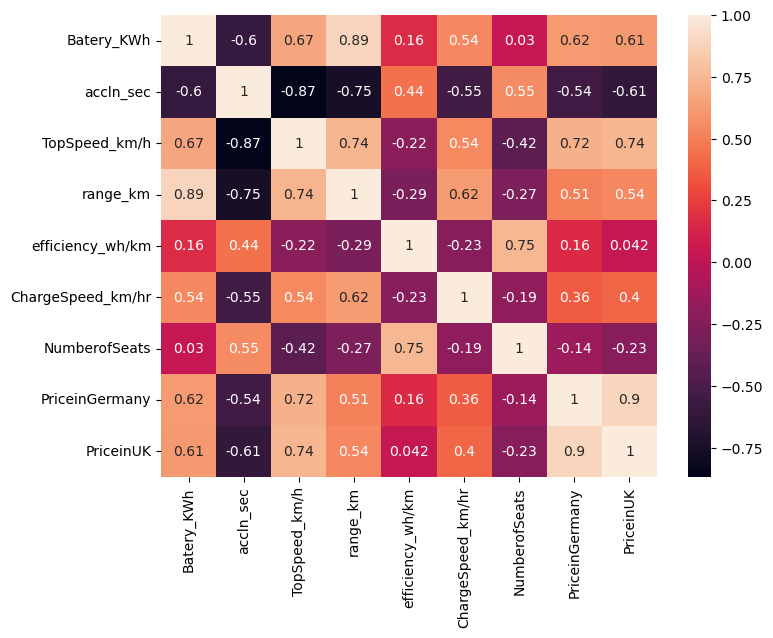

In [91]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

1) Battery capacity is positively correlated with range (0.89) and efficiency (0.62). This means that cars with larger batteries can travel further on a single charge and are more efficient at using energy.

2) Acceleration is negatively correlated with range (-0.75) and efficiency (-0.87). This means that cars that can accelerate faster tend to have shorter ranges and are less efficient.

3) Top speed is also negatively correlated with range (-0.50) and efficiency (-0.75). This means that cars with higher top speeds tend to have shorter ranges and are less efficient.

4) Price is positively correlated with battery capacity (0.62), range (0.51), efficiency (0.75), and top speed (0.72). This means that more expensive cars typically have larger batteries, longer ranges, are more efficient, and have higher top speeds.

In [92]:
df.columns

Index(['Brand', 'Batery_KWh', 'accln_sec', 'TopSpeed_km/h', 'range_km',
       'efficiency_wh/km', 'ChargeSpeed_km/hr', 'drive', 'NumberofSeats',
       'PriceinGermany', 'PriceinUK'],
      dtype='object')

In [93]:
ax=df.Brand.value_counts()  #visualising the available options to choose from

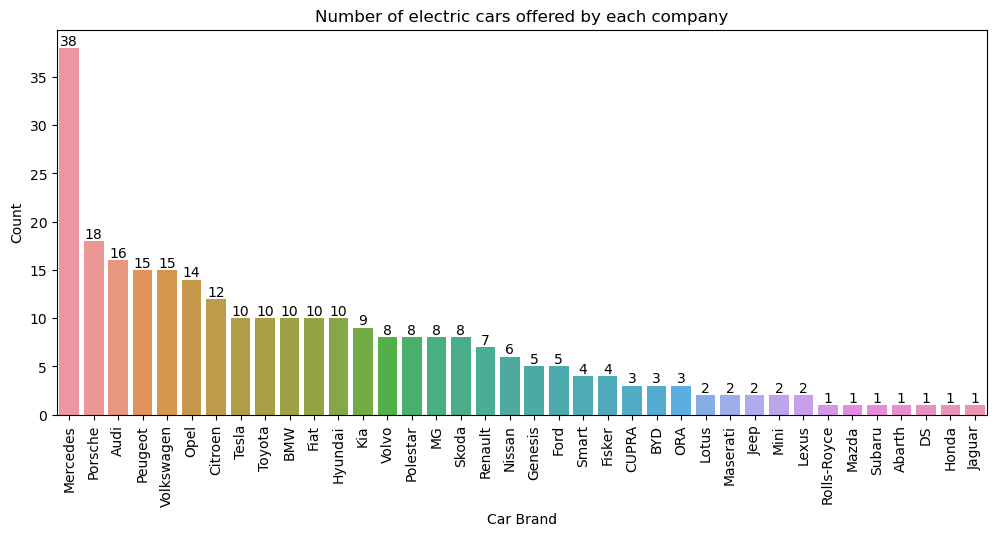

In [94]:
plt.figure(figsize=(12,5))

bx=sns.barplot(x=ax.index, y=ax.values)


plt.title('Number of electric cars offered by each company')
plt.xlabel('Car Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)

for bars in bx.containers:
    bx.bar_label(bars)

Mercedes offer most number of electric vehicles in the market.

In [95]:
ax=df.drive.value_counts() #Distribution of drive systems

Text(0.5, 1.0, 'Popular Drive systems')

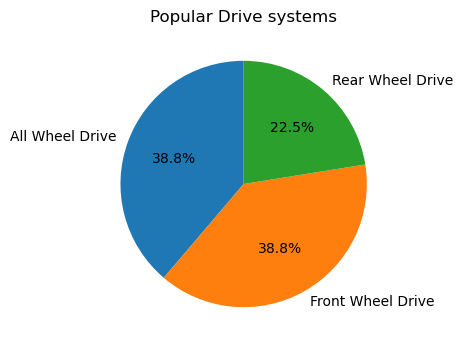

In [96]:
plt.figure(figsize=(4, 4))
plt.pie(ax, labels=ax.index, autopct='%1.1f%%', startangle=90)
plt.title('Popular Drive systems')

Majority vehicles are using all wheel drive and front wheel drive.

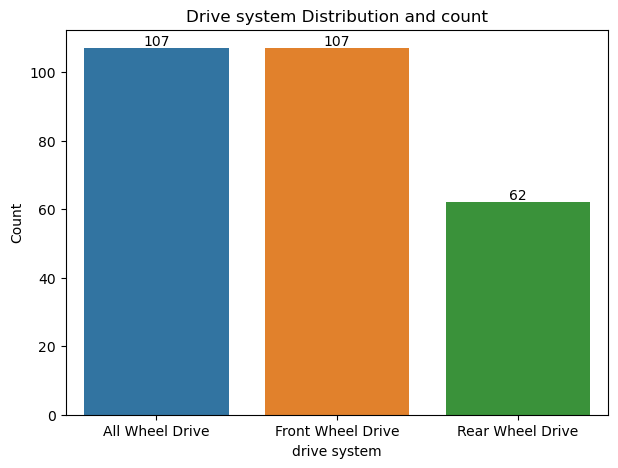

In [97]:
plt.figure(figsize=(7,5)) #visualizing the count of the drive system 

ax=sns.countplot(x='drive', data=df)

plt.title('Drive system Distribution and count')
plt.xlabel('drive system')
plt.ylabel('Count')
plt.xticks(rotation=0)

for bars in ax.containers:
    ax.bar_label(bars)

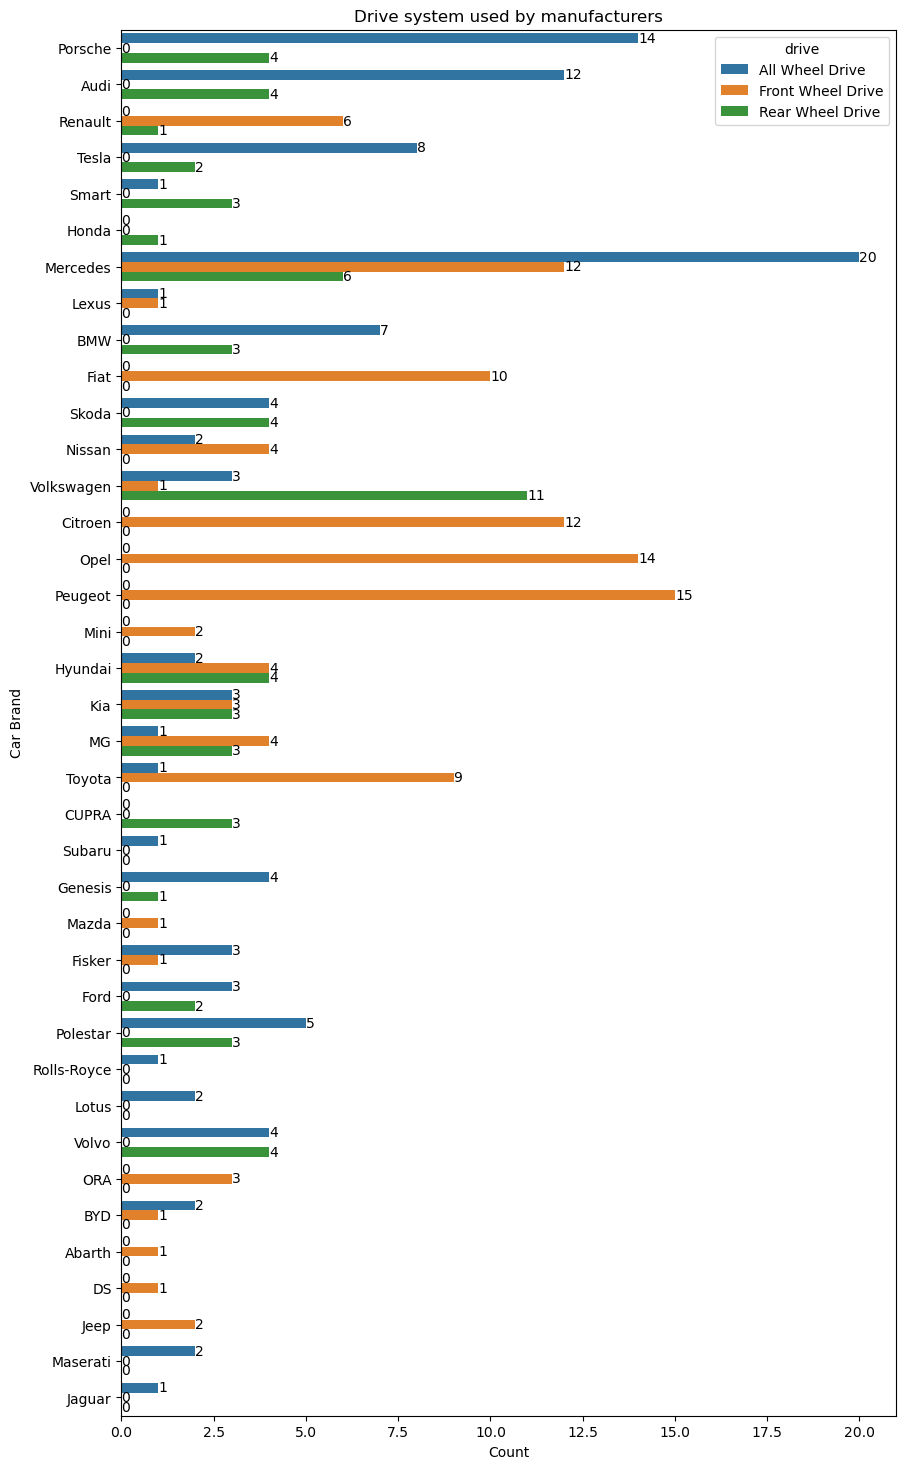

In [98]:
plt.figure(figsize=(10,18)) # 

ax=sns.countplot(y='Brand', hue='drive', data=df)

plt.title('Drive system used by manufacturers')
plt.ylabel('Car Brand')
plt.xlabel('Count')
plt.xticks(rotation=0)

for bars in ax.containers:
    ax.bar_label(bars)

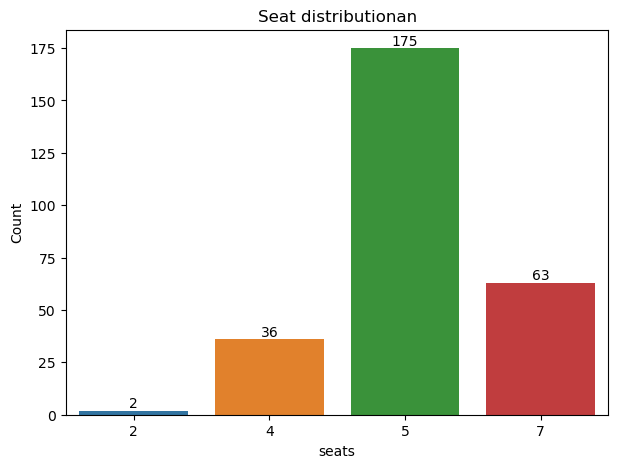

In [99]:
plt.figure(figsize=(7,5)) # 

ax=sns.countplot(x='NumberofSeats', data=df)

plt.title('Seat distributionan')
plt.xlabel('seats')
plt.ylabel('Count')
plt.xticks(rotation=0)

for bars in ax.containers:
    ax.bar_label(bars)

Majority of vehicles are having 5 seats.

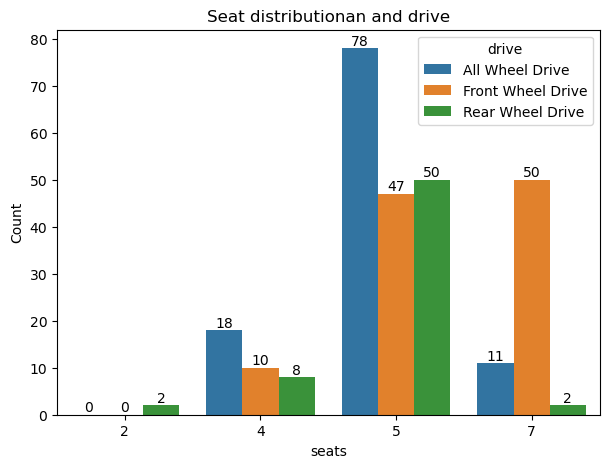

In [100]:
plt.figure(figsize=(7,5)) # 

ax=sns.countplot(x='NumberofSeats', hue='drive', data=df)

plt.title('Seat distributionan and drive')
plt.xlabel('seats')
plt.ylabel('Count')
plt.xticks(rotation=0)

for bars in ax.containers:
    ax.bar_label(bars)

1) Majority od vehicles having 5 seats use all wheel drive.
2) Front wheel drive is preferred more in 7 seater vehicles.

In [101]:
# checking if brandvalue have an effect on cost or not.
brand_cost=df.groupby(['Brand'],as_index=False)['PriceinGermany'].mean().sort_values(by='PriceinGermany',ascending=False)

In [102]:
brand_cost.head()

Brand  PriceinGermany
30  Rolls-Royce   400000.000000
19     Maserati   187500.000000
28      Porsche   130015.944444
17        Lotus   123490.000000
2           BMW    95820.000000

Text(-50.55555555555555, 0.5, 'Brand')

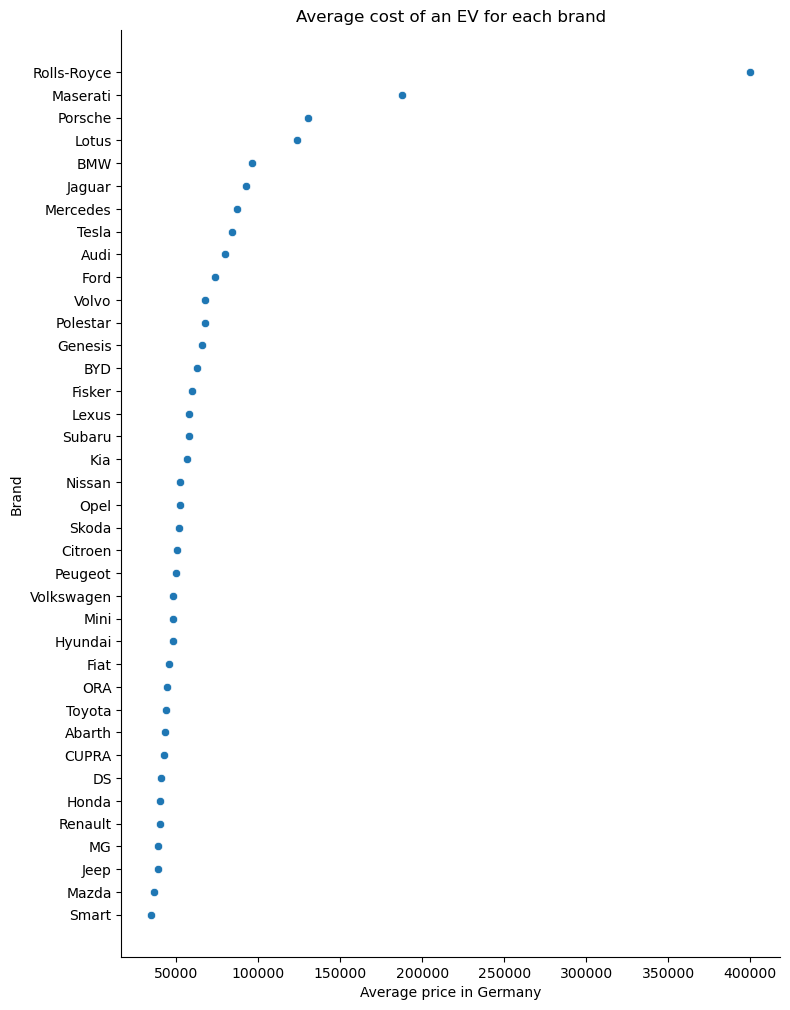

In [103]:
sns.relplot(y="Brand", x="PriceinGermany", height=10, aspect=0.8 ,data=brand_cost)

plt.title('Average cost of an EV for each brand')
plt.xlabel('Average price in Germany')
plt.ylabel('Brand')

In [104]:
# checking if brandvalue have an effect on cost or not.
brand_cost_uk =df.groupby(['Brand'],as_index=False)['PriceinUK'].mean().sort_values(by='PriceinUK',ascending=False)

In [105]:
brand_cost_uk.head()

Brand      PriceinUK
30  Rolls-Royce  350000.000000
19     Maserati  167500.000000
17        Lotus  104750.000000
28      Porsche  102628.333333
2           BMW   86985.000000

Text(-50.55555555555555, 0.5, 'Brand')

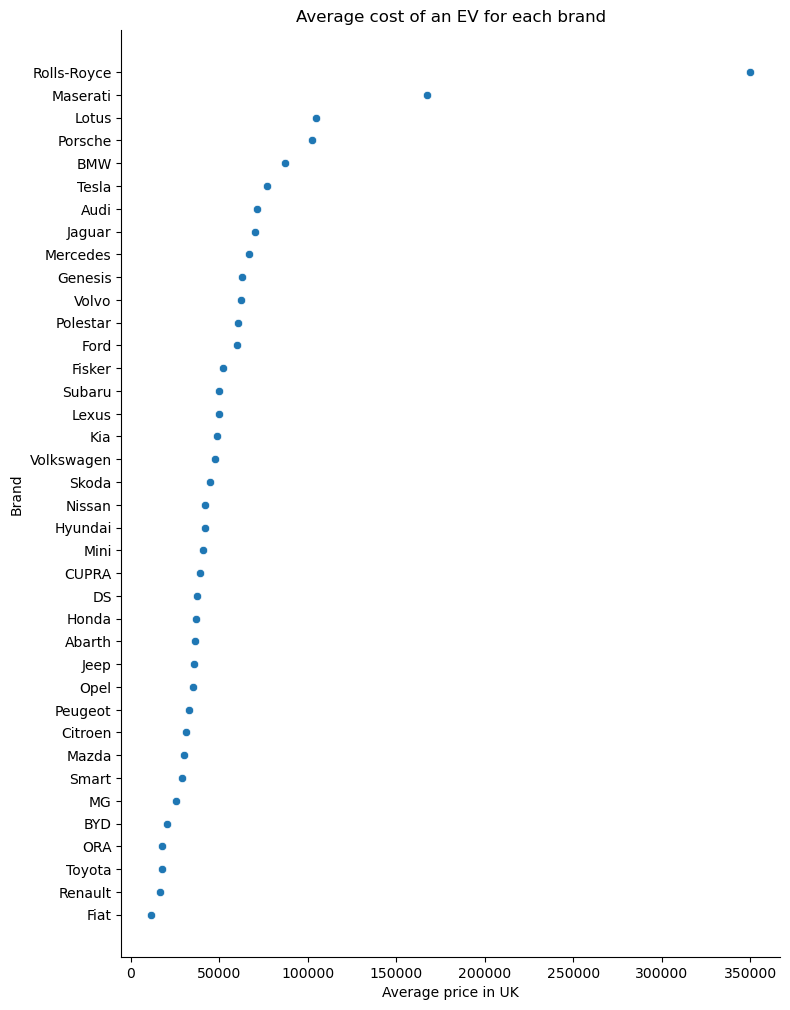

In [106]:
sns.relplot(y="Brand", x="PriceinUK", height=10, aspect=0.8 ,data=brand_cost_uk)

plt.title('Average cost of an EV for each brand')
plt.xlabel('Average price in UK')
plt.ylabel('Brand')

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

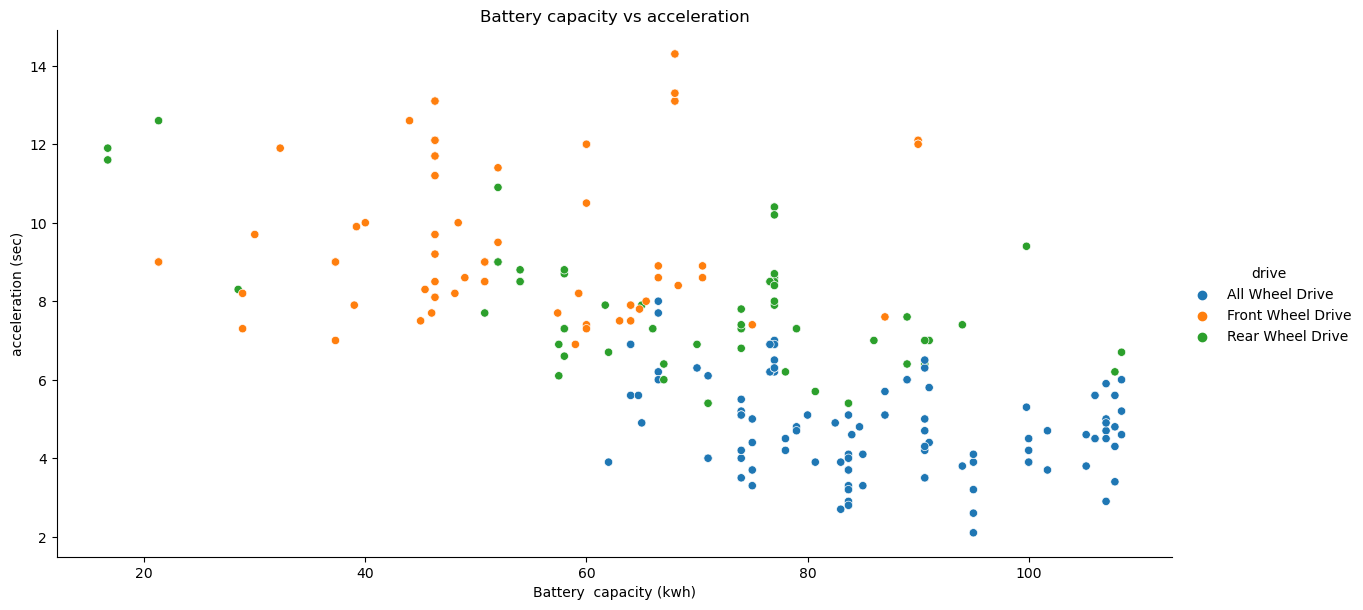

In [107]:
#based on usage there will be relation between the battery capacity and  acceleration of the vehicle.
sns.relplot(x="Batery_KWh", y="accln_sec", height=6,aspect=2,hue="drive",data=df)

plt.title('Battery capacity vs acceleration')
plt.xlabel('Battery  capacity (kwh)')
plt.ylabel('acceleration (sec)')
plt.xticks(rotation=0)

All wheel drive cars are having huge batteries and the acceleraton is really fast.

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

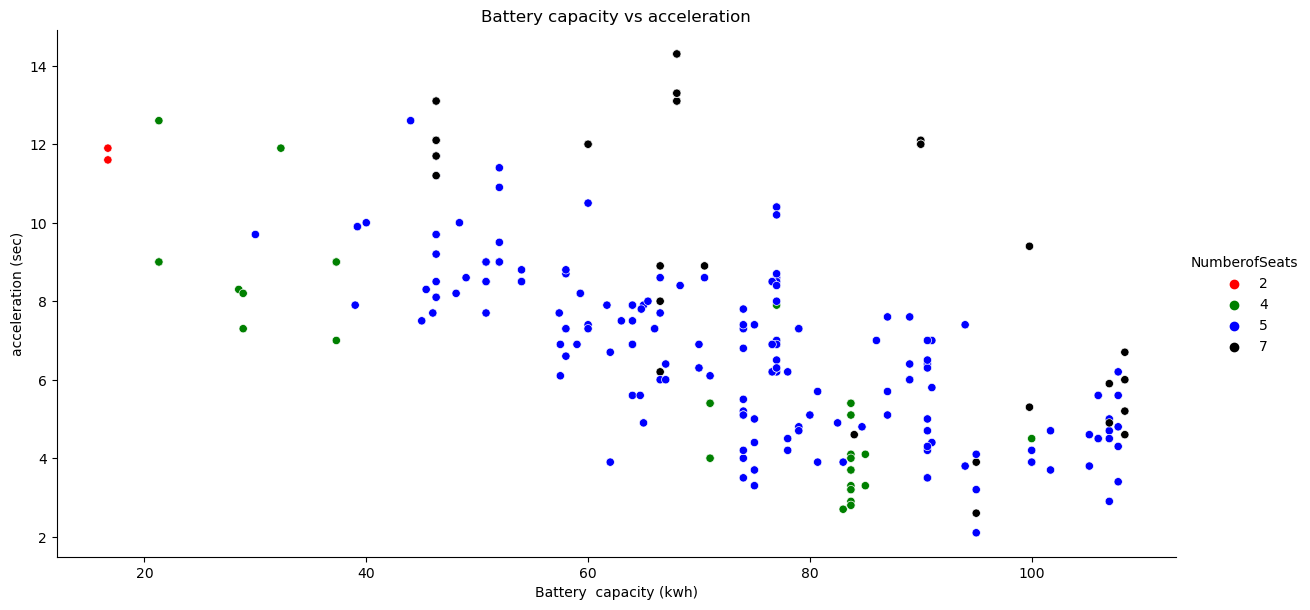

In [108]:
sns.relplot(x="Batery_KWh", y="accln_sec", height=6,aspect=2,hue="NumberofSeats",data=df,palette=["red", "green", "blue", "black"])

plt.title('Battery capacity vs acceleration')
plt.xlabel('Battery  capacity (kwh)')
plt.ylabel('acceleration (sec)')
plt.xticks(rotation=0)

Majority cars are 5 seaters. 5 seater cars which are fast have an all wheel drive system.

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

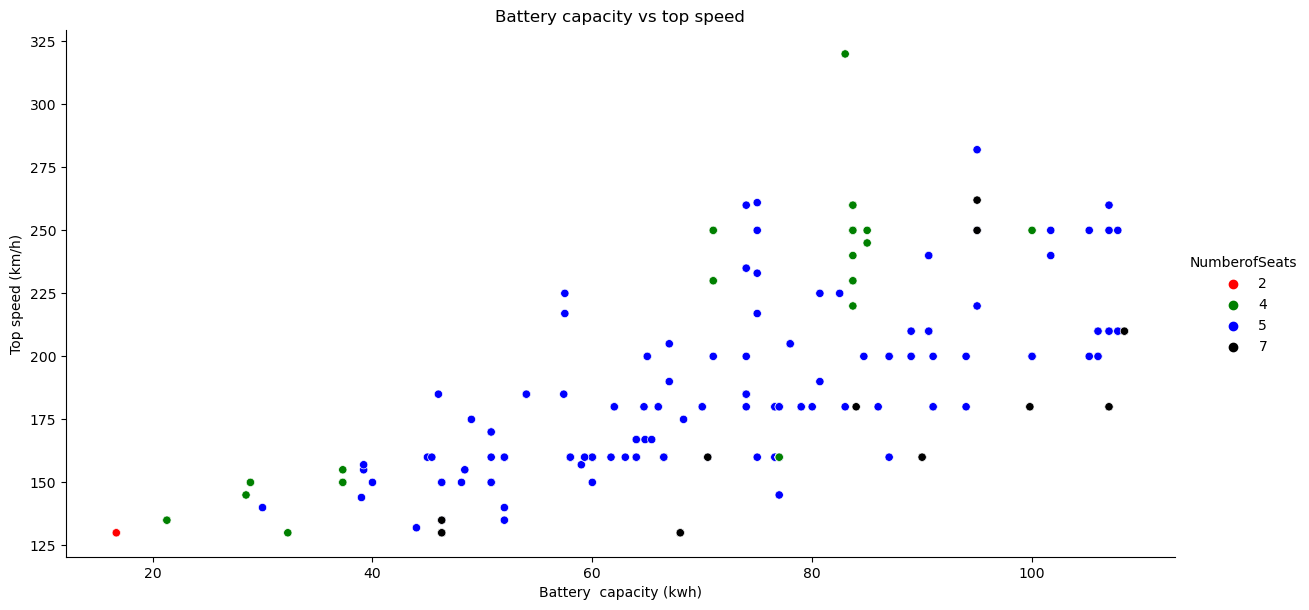

In [109]:
#relation of battery and top speed w.r.t. Number of seets

sns.relplot(x="Batery_KWh", y="TopSpeed_km/h", height=6,aspect=2,hue="NumberofSeats",data=df,palette=["red", "green", "blue", "black"])

plt.title('Battery capacity vs top speed')
plt.xlabel('Battery  capacity (kwh)')
plt.ylabel('Top speed (km/h)')
plt.xticks(rotation=0)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

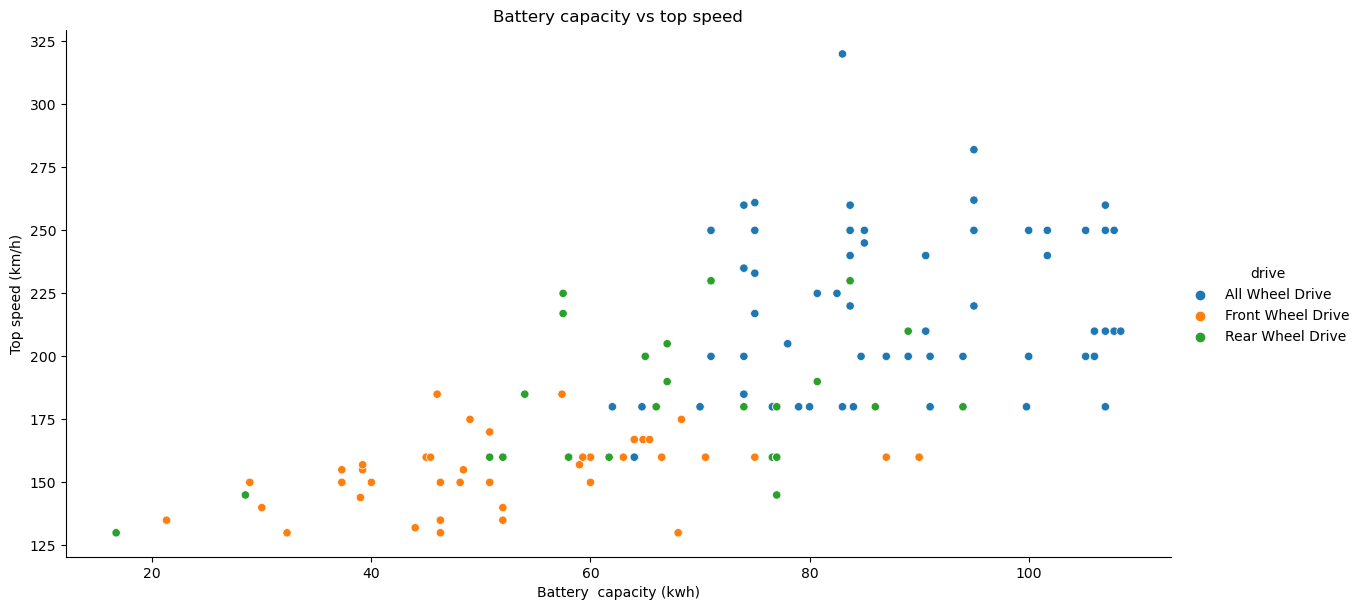

In [110]:
#relation of battery and top speed w.r.t. drive

sns.relplot(x="Batery_KWh", y="TopSpeed_km/h", height=6,aspect=2,hue="drive",data=df,)

plt.title('Battery capacity vs top speed')
plt.xlabel('Battery  capacity (kwh)')
plt.ylabel('Top speed (km/h)')
plt.xticks(rotation=0)

All wheel drive cars are majoritily 5 seater cars and have better performance in terms of battery capacity and top speed.

Text(49.62089120370371, 0.5, 'range (km)')

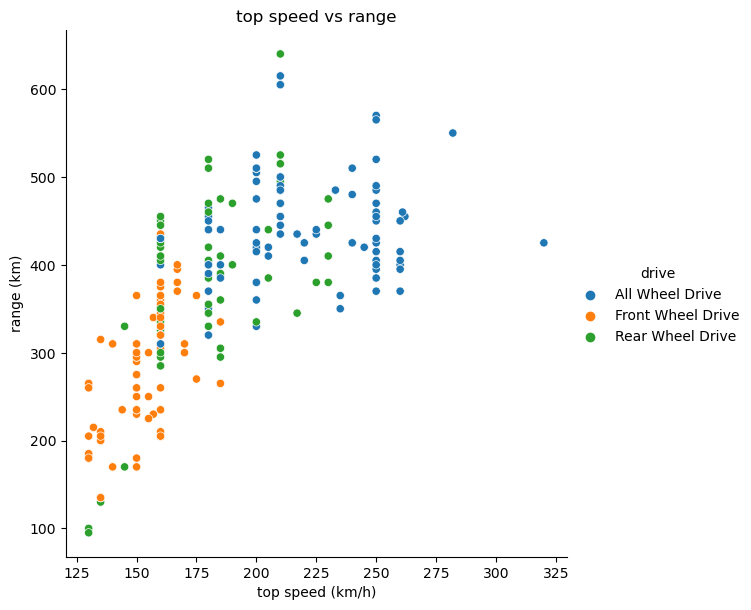

In [111]:
# Speed vs range graph
sns.relplot(x="TopSpeed_km/h", y="range_km",height=6, hue="drive",data=df)

plt.title('top speed vs range')
plt.xlabel('top speed (km/h)')
plt.ylabel('range (km)')

Text(43.016428755144034, 0.5, 'range (km)')

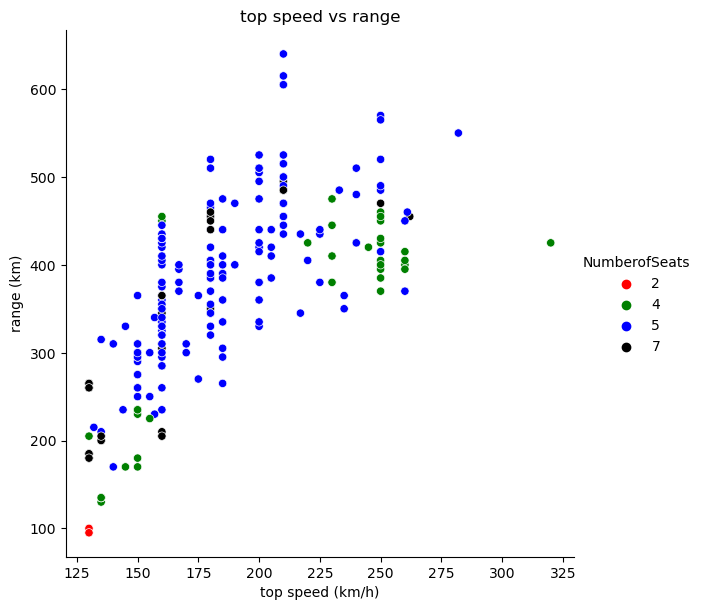

In [112]:
# Speed vs range graph
sns.relplot(x="TopSpeed_km/h", y="range_km",height=6, hue="NumberofSeats",palette=["red", "green", "blue", "black"],data=df)

plt.title('top speed vs range')
plt.xlabel('top speed (km/h)')
plt.ylabel('range (km)')

All wheel drive EVs are better in terms of renge and top speed.

Text(57.364328703703706, 0.5, 'Price in Germany')

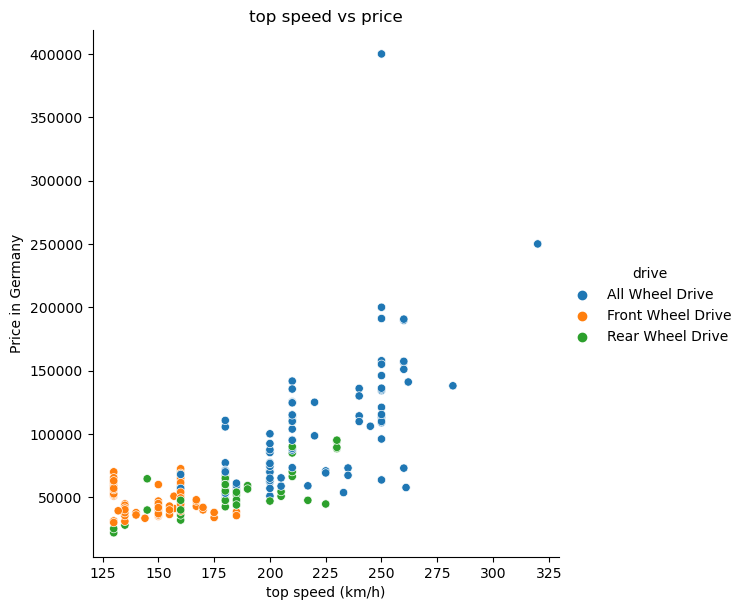

In [113]:
# Usually fast cars have higher price range so we will plot a graph for top speed and price 

sns.relplot(x="TopSpeed_km/h", y="PriceinGermany",height=6, hue="drive",data=df)

plt.title('top speed vs price')
plt.xlabel('top speed (km/h)')
plt.ylabel('Price in Germany')

Text(48.27979681069958, 0.5, 'Price in Germany')

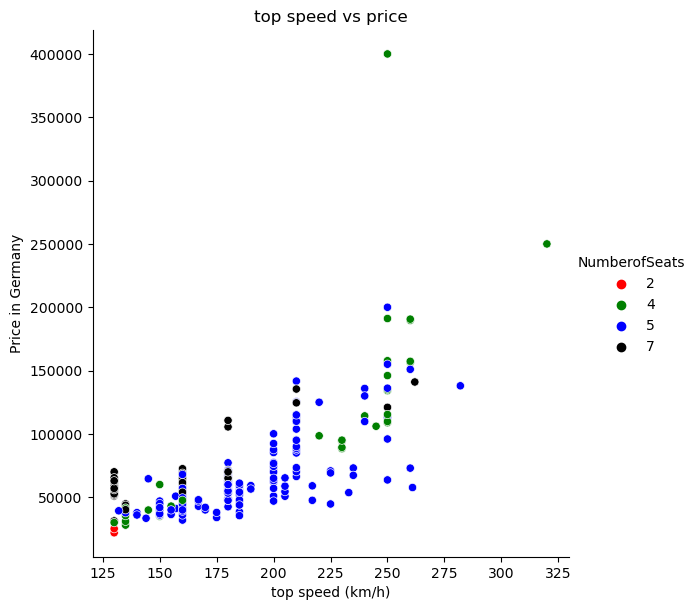

In [114]:
# Usually fast cars have higher price range so we will plot a graph for top speed and price 

sns.relplot(x="TopSpeed_km/h", y="PriceinGermany",height=6, hue="NumberofSeats",data=df, palette=["red", "green", "blue", "black"])

plt.title('top speed vs price')
plt.xlabel('top speed (km/h)')
plt.ylabel('Price in Germany')

The faster the car, the higher is the price.

In [115]:
import plotly.express as px # For 3d visualization 

In [116]:
fig = px.scatter_3d(df, x='accln_sec', y='efficiency_wh/km', z='PriceinGermany', color='Brand', height=800, width=800)
fig.update_layout(title='3D scatter plot of electric vehicles')
fig.show()

Price, acceleration and efficiency are the major factors considered while a customer tries to buy a car. Mercedes presents a wide range for selection where we can observe that the company has most economical car along with cars that are fast and fun to drive but little less on efficiency.

# Conclusion of EDA

1. EV manufacturers either use all wheel drive system or front wheel drive system. Front wheel drive system is available in very limited models.
2. Cars using all wheel drive systems are equipped with heavy batteries and also seemed to have better efficiency.
3. Seating capacities ranges from 2 seater upto 7 seater in the data available. The 2 seater cars can be called as concept cars or maybe very old models since they tend to fall on a low end in terms of performance parameters. 
4. All wheel drive cars majoritily have seating capacity of 5 passengers followed by 7 paggengers.
5. 7 seater cars have generally all wheel drive followed by a front wheel drive.
6. All wheel drive EVs are comparitively faster and also they are higher on prise range.
7. 4 seater cars have an optimised speed to range ratio.
8. 7 seater EVs have low speed and good range. 

# Predictive modeling  

In [117]:
df.head()

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
1  Porsche        83.7        2.8            260       400               209   
2     Audi        85.0        3.3            250       405               210   
3  Renault        52.0       11.4            135       315               165   
4     Audi        52.0        9.0            160       285               182   
5    Tesla        75.0        3.7            250       415               181   

   ChargeSpeed_km/hr              drive  NumberofSeats  PriceinGermany  \
1                9.0    All Wheel Drive              4      189668.000   
2                1.0    All Wheel Drive              4      146050.000   
3                2.0  Front Wheel Drive              5       36840.000   
4                3.0   Rear Wheel Drive              5       70905.625   
5                6.0    All Wheel Drive              5       63667.000   

    PriceinUK  
1  142400.000  
2  115000.000  
3    9570.000  
4   56860.625  
5   59990.000

In [118]:
df.drive.unique()

array(['All Wheel Drive', 'Front Wheel Drive', 'Rear Wheel Drive'],
      dtype=object)

For the predictive model we will convert the drive column to numeric values with the help of mapping function.
The mapping values are as following -
1) Front Wheel Drive: 1
2) Rear Wheel Drive: 2
3) All Wheel Drive: 3

In [119]:
# Define the mapping dictionary
drive_mapping = {'Front Wheel Drive': 1,'Rear Wheel Drive': 2, 'All Wheel Drive': 3 }

# Use the map function to create a new column with the mapped values
df['drive'] = df['drive'].map(drive_mapping) 


In [120]:
df.head() #checking the 

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
1  Porsche        83.7        2.8            260       400               209   
2     Audi        85.0        3.3            250       405               210   
3  Renault        52.0       11.4            135       315               165   
4     Audi        52.0        9.0            160       285               182   
5    Tesla        75.0        3.7            250       415               181   

   ChargeSpeed_km/hr  drive  NumberofSeats  PriceinGermany   PriceinUK  
1                9.0      3              4      189668.000  142400.000  
2                1.0      3              4      146050.000  115000.000  
3                2.0      1              5       36840.000    9570.000  
4                3.0      2              5       70905.625   56860.625  
5                6.0      3              5       63667.000   59990.000

### Observing the distribution of data

In [121]:
df.describe().T

count          mean           std      min       25%  \
Batery_KWh         276.0     69.996377     20.652600     16.7     52.00   
accln_sec          276.0      7.691667      3.058515      2.1      5.10   
TopSpeed_km/h      276.0    179.021739     38.784058    130.0    150.00   
range_km           276.0    354.891304    107.165068     95.0    265.00   
efficiency_wh/km   276.0    200.137681     33.484801    150.0    174.00   
ChargeSpeed_km/hr  276.0      4.196429      2.219032      1.0      2.00   
drive              276.0      2.000000      0.882146      1.0      1.00   
NumberofSeats      276.0      5.304348      1.009833      2.0      5.00   
PriceinGermany     276.0  68599.975738  39872.583226  21940.0  44657.25   
PriceinUK          276.0  53853.342830  36782.271092   6429.0  34758.75   

                       50%        75%       max  
Batery_KWh            70.5     83.700     108.4  
accln_sec              7.3      9.425      14.3  
TopSpeed_km/h        172.5    205.000     320.0  
range_km             365.0    431.250     640.0  
efficiency_wh/km     192.0    217.000     295.0  
ChargeSpeed_km/hr      4.0      6.000       9.0  
drive                  2.0      3.000       3.0  
NumberofSeats          5.0      5.000       7.0  
PriceinGermany     57195.0  71849.250  400000.0  
PriceinUK          45477.5  61321.250  350000.0

We will create a new data frame df1 to store the values after removing the outliers.

Using (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap.

In [122]:
df.columns

Index(['Brand', 'Batery_KWh', 'accln_sec', 'TopSpeed_km/h', 'range_km',
       'efficiency_wh/km', 'ChargeSpeed_km/hr', 'drive', 'NumberofSeats',
       'PriceinGermany', 'PriceinUK'],
      dtype='object')

In [123]:
# Graphically analysing the distribution of data

C:\Users\prati\AppData\Local\Temp\ipykernel_13788\3526774868.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\3526774868.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\3526774868.py:9: UserWarning:



`distplot` is

<Axes: xlabel='TopSpeed_km/h', ylabel='Density'>

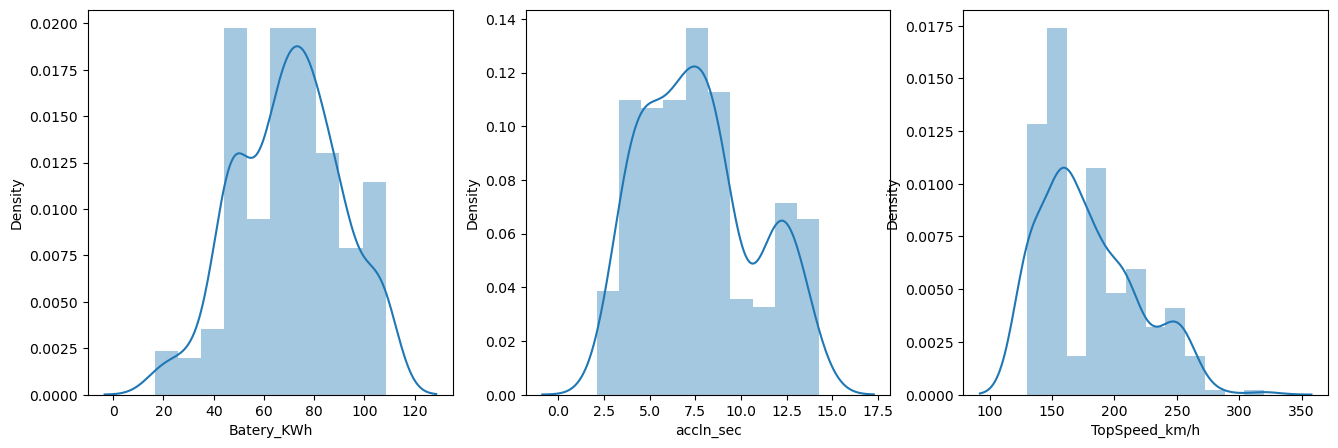

In [124]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(df['Batery_KWh'])

plt.subplot(1,3,2)
sns.distplot(df['accln_sec'])

plt.subplot(1,3,3)
sns.distplot(df['TopSpeed_km/h'])



C:\Users\prati\AppData\Local\Temp\ipykernel_13788\918168938.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\918168938.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\918168938.py:10: UserWarning:



`distplot` is a

<Axes: xlabel='ChargeSpeed_km/hr', ylabel='Density'>

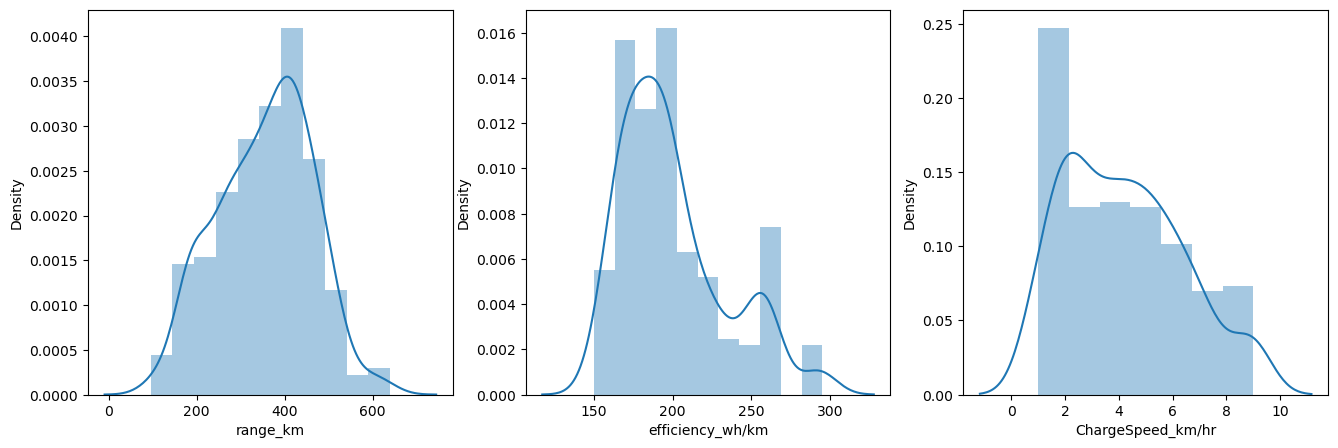

In [125]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.distplot(df['range_km'])

plt.subplot(1,3,2)
sns.distplot(df['efficiency_wh/km'])

plt.subplot(1,3,3)
sns.distplot(df['ChargeSpeed_km/hr'])


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\122704065.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\122704065.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\122704065.py:10: UserWarning:



`distplot` is a

<Axes: xlabel='PriceinUK', ylabel='Density'>

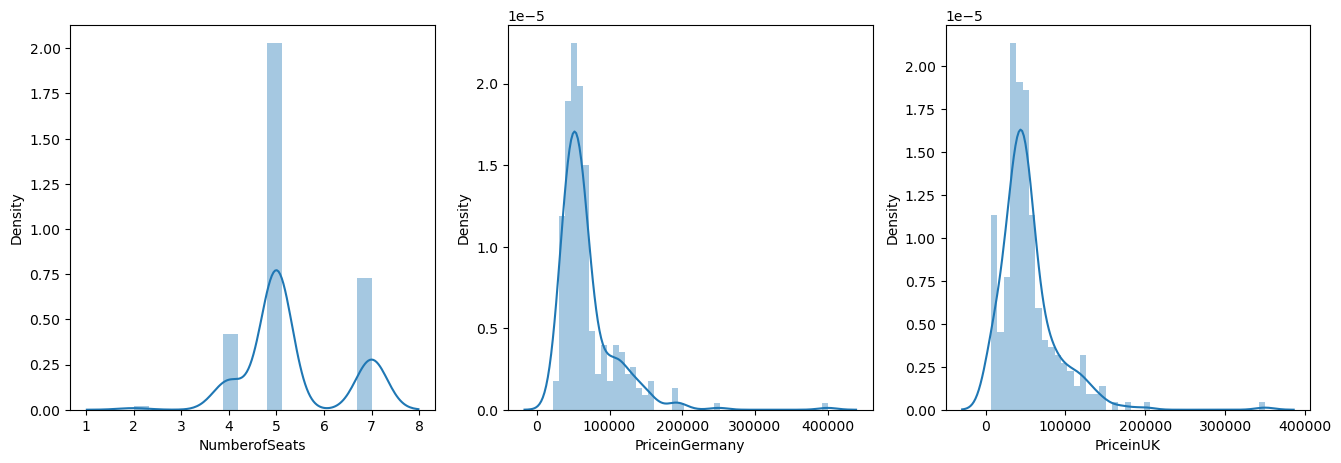

In [126]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.distplot(df['NumberofSeats'])

plt.subplot(1,3,2)
sns.distplot(df['PriceinGermany'])

plt.subplot(1,3,3)
sns.distplot(df['PriceinUK'])


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\3983977722.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='drive', ylabel='Density'>

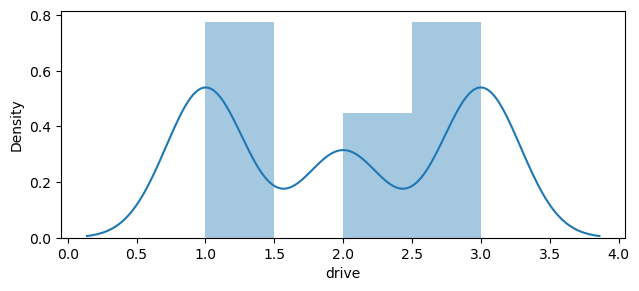

In [127]:
plt.figure(figsize=(16,10))

plt.subplot(3,2,1)
sns.distplot(df['drive'])

Upon careful examination we found that the data is not normally distributed 

In [128]:
df1=df #creating a new dataframe 

### Removing the outliers

In [129]:
# Batery_KWh
q1=df1['Batery_KWh'].quantile(0.25)
q3=df1['Batery_KWh'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df1=df1[~((df['Batery_KWh']<ll) | (df1['Batery_KWh']>ul))]
df1.shape

31.700000000000003


(276, 11)

In [130]:
# accln_sec
q1=df1['accln_sec'].quantile(0.25)
q3=df1['accln_sec'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df1=df1[~((df['accln_sec']<ll) | (df1['accln_sec']>ul))]
df1.shape

4.325000000000001


(276, 11)

In [131]:
# TopSpeed_km/h
q1=df1['TopSpeed_km/h'].quantile(0.25)
q3=df1['TopSpeed_km/h'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df1=df1[~((df['TopSpeed_km/h']<ll) | (df1['TopSpeed_km/h']>ul))]
df1.shape

55.0


(275, 11)

In [132]:
# range_km
q1=df1['range_km'].quantile(0.25)
q3=df1['range_km'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df1=df1[~((df['range_km']<ll) | (df1['range_km']>ul))]
df1.shape

167.5


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\447240164.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(275, 11)

In [133]:
# efficiency_wh/km
q1=df1['efficiency_wh/km'].quantile(0.25)
q3=df1['efficiency_wh/km'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df1=df1[~((df['efficiency_wh/km']<ll) | (df1['efficiency_wh/km']>ul))]
df1.shape

43.0


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\2767794084.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(267, 11)

In [134]:
# ChargeSpeed_km/hr
q1=df1['ChargeSpeed_km/hr'].quantile(0.25)
q3=df1['ChargeSpeed_km/hr'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df1=df1[~((df['ChargeSpeed_km/hr']<ll) | (df1['ChargeSpeed_km/hr']>ul))]
df1.shape

4.0


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\3507654871.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(267, 11)

In [135]:
# PriceinGermany
q1=df1['PriceinGermany'].quantile(0.25)
q3=df1['PriceinGermany'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df1=df1[~((df['PriceinGermany']<ll) | (df1['PriceinGermany']>ul))]
df1.shape

27995.0


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\2758903175.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(237, 11)

In [136]:
# PriceinUK
q1=df1['PriceinUK'].quantile(0.25)
q3=df1['PriceinUK'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df1=df1[~((df['PriceinUK']<ll) | (df1['PriceinUK']>ul))]
df1.shape

23010.0


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\701170901.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(228, 11)

In [137]:
print('Total number of rows removed', df.shape[0] - df1.shape[0])
print('There were originally', df.shape[0] ,'rows present.')

Total number of rows removed 48
There were originally 276 rows present.


### Comparing the graphs of data frame df and data frame df1

C:\Users\prati\AppData\Local\Temp\ipykernel_13788\1827589121.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\1827589121.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Batery_KWh', ylabel='Density'>

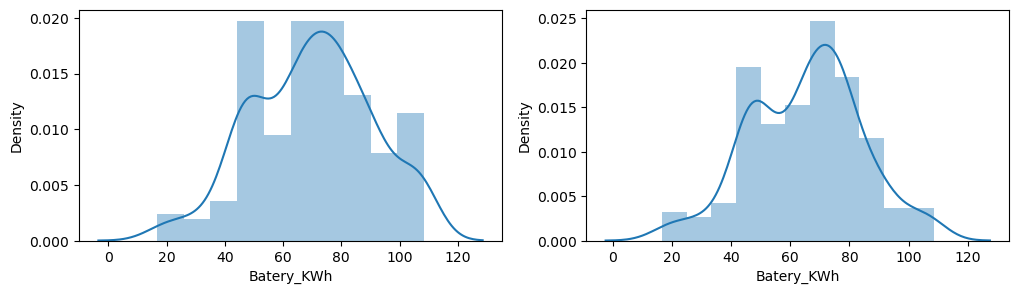

In [138]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.distplot(df['Batery_KWh'])

plt.subplot(1,2,2)
sns.distplot(df1['Batery_KWh'])


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\1795226719.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\1795226719.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='accln_sec', ylabel='Density'>

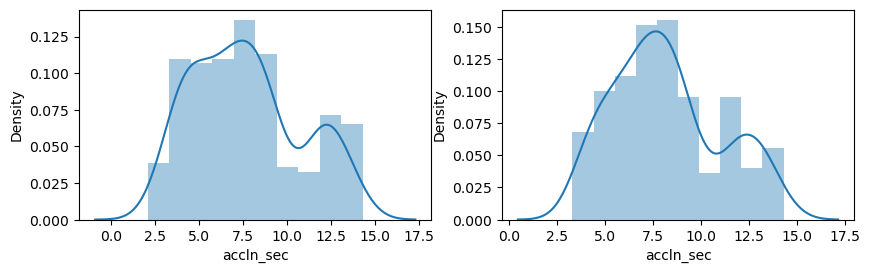

In [139]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.distplot(df['accln_sec'])

plt.subplot(2,2,2)
sns.distplot(df1['accln_sec'])


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\3652080977.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\3652080977.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='TopSpeed_km/h', ylabel='Density'>

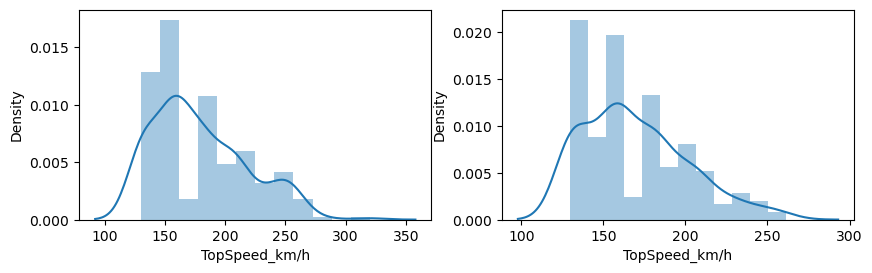

In [140]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,3)
sns.distplot(df['TopSpeed_km/h'])

plt.subplot(2,2,4)
sns.distplot(df1['TopSpeed_km/h'])

C:\Users\prati\AppData\Local\Temp\ipykernel_13788\231585420.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\231585420.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='range_km', ylabel='Density'>

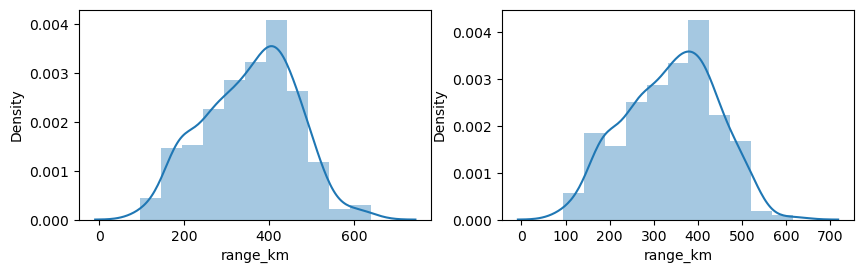

In [141]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.distplot(df['range_km'])

plt.subplot(2,2,2)
sns.distplot(df1['range_km'])



C:\Users\prati\AppData\Local\Temp\ipykernel_13788\3096015979.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\3096015979.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='efficiency_wh/km', ylabel='Density'>

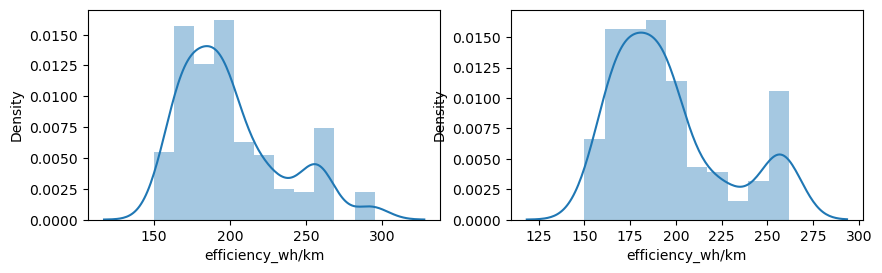

In [142]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.distplot(df['efficiency_wh/km'])

plt.subplot(2,2,2)
sns.distplot(df1['efficiency_wh/km'])

C:\Users\prati\AppData\Local\Temp\ipykernel_13788\426870677.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\426870677.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='ChargeSpeed_km/hr', ylabel='Density'>

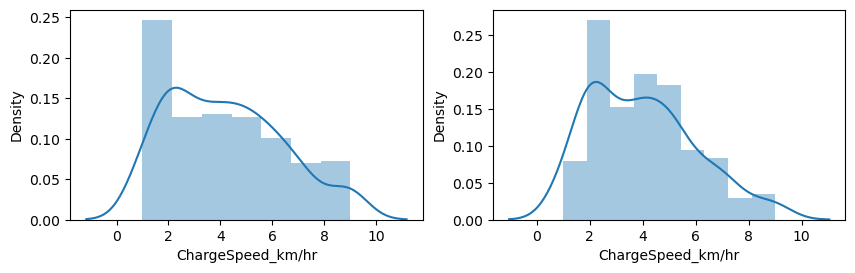

In [143]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.distplot(df['ChargeSpeed_km/hr'])

plt.subplot(2,2,2)
sns.distplot(df1['ChargeSpeed_km/hr'])

C:\Users\prati\AppData\Local\Temp\ipykernel_13788\1651637993.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\1651637993.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='drive', ylabel='Density'>

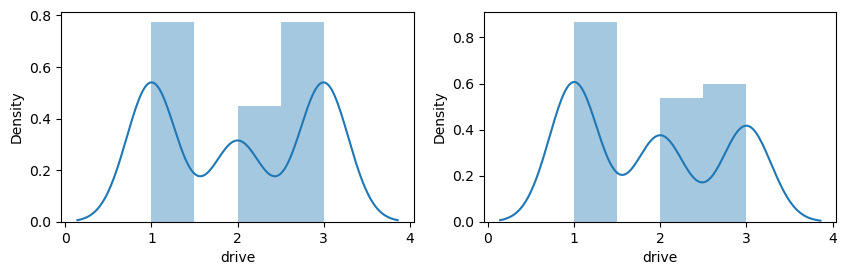

In [144]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.distplot(df['drive'])

plt.subplot(2,2,2)
sns.distplot(df1['drive'])

C:\Users\prati\AppData\Local\Temp\ipykernel_13788\3328977471.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\prati\AppData\Local\Temp\ipykernel_13788\3328977471.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='PriceinGermany', ylabel='Density'>

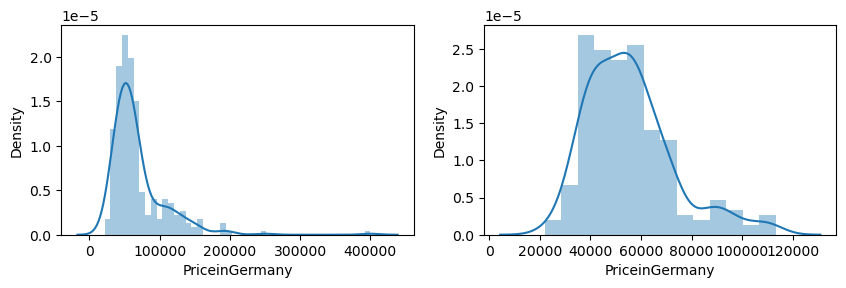

In [145]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.distplot(df['PriceinGermany'])

plt.subplot(2,2,2)
sns.distplot(df1['PriceinGermany'])

On comparisn we found that the data is taking the shape of bell curve after the outliers has been removed.

In [146]:
df1.describe().T

count          mean           std      min        25%  \
Batery_KWh         228.0     65.346930     18.823079     16.7     50.800   
accln_sec          228.0      8.183333      2.805954      3.3      6.175   
TopSpeed_km/h      228.0    169.587719     31.641803    130.0    150.000   
range_km           228.0    338.618421    101.666506     95.0    260.000   
efficiency_wh/km   228.0    195.907895     31.126505    150.0    172.750   
ChargeSpeed_km/hr  228.0      3.987782      2.021628      1.0      2.000   
drive              228.0      1.864035      0.846826      1.0      1.000   
NumberofSeats      228.0      5.298246      0.965756      2.0      5.000   
PriceinGermany     228.0  55550.167999  17346.996616  21940.0  42330.000   
PriceinUK          228.0  42573.275923  19033.912698   6429.0  31870.000   

                            50%       75%       max  
Batery_KWh            68.000000     77.00     108.4  
accln_sec              7.850000      9.75      14.3  
TopSpeed_km/h        160.000000    185.00     261.0  
range_km             347.500000    410.00     615.0  
efficiency_wh/km     188.500000    207.00     262.0  
ChargeSpeed_km/hr      4.000000      5.00       9.0  
drive                  2.000000      3.00       3.0  
NumberofSeats          5.000000      5.00       7.0  
PriceinGermany     53707.000000  63300.00  113359.0  
PriceinUK          44131.150585  53680.00   89500.0

### Importing ML libraries

In [147]:
pip install scikit-learn --upgrade


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [148]:
pip install  xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [149]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score

### Creating Feature Matrix x and storing target value in y

NOTE- for accuracy and efficiency only the price of German market has been considered 

In [150]:
df1.columns

Index(['Brand', 'Batery_KWh', 'accln_sec', 'TopSpeed_km/h', 'range_km',
       'efficiency_wh/km', 'ChargeSpeed_km/hr', 'drive', 'NumberofSeats',
       'PriceinGermany', 'PriceinUK'],
      dtype='object')

In [151]:
# Define features and target variables
X = df1.drop(columns=['PriceinGermany', 'PriceinUK'])
y = df1[['PriceinGermany']]

In [152]:
X = X.drop(columns=['Brand']) #brand value may be a factor affecting price but it is not the primary factor hence can be ignored here

In [153]:
# train test split
#since data is not very large, only 20 % is taken as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)


In [154]:
print(X_train.shape,y_train.shape)

(182, 8) (182, 1)


In [155]:
print(X_test.shape,y_test.shape)

(46, 8) (46, 1)


#### Estimate the coefficients for each input feature.

In [156]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         PriceinGermany   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              719.8
Date:                Sat, 28 Oct 2023   Prob (F-statistic):                   4.89e-129
Time:                        13:22:00   Log-Likelihood:                         -1932.9
No. Observations:                 182   AIC:                                      3882.
Df Residuals:                     174   BIC:                                      3907.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Batery_KWh         1141.4090    218.150      5.232      0.000     710.848    1571.970
accln_sec          -336.9602    687.177     -0.490      0.625   -1693.236    1019.316
TopSpeed_km/h       229.0300     50.006      4.580      0.000     130.334     327.726
range_km           -140.8992     41.667     -3.382      0.001    -223.138     -58.661
efficiency_wh/km     -0.4575     84.286     -0.005      0.996    -166.811     165.896
ChargeSpeed_km/hr  -664.9984    558.863     -1.190      0.236   -1768.021     438.024
drive               335.8000   1584.644      0.212      0.832   -2791.797    3463.397
NumberofSeats     -1112.0321   1474.256     -0.754      0.452   -4021.759    1797.695
==============================================================================
Omnibus:                       34.624   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.288
Skew:                           0.893   Prob(JB):                     9.00e-16
Kurtosis:                       5.439   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [157]:
# Regression models
random_forest = RandomForestRegressor()
decision_tree = DecisionTreeRegressor()
xg_boost =  XGBRegressor()
lin_reg  =  LinearRegression()

### model training and validation

In [158]:
mypipeline= [random_forest, decision_tree, xg_boost, lin_reg]

# training the pipelines
for pipe in mypipeline:
    pipe.fit(X_train,y_train)

C:\Users\prati\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [159]:
PipelineDict = {0: 'Random Forest', 1: 'Decision Tree', 2:'XG Boost', 3: 'Linear Regression'}

In [160]:
for i,model in enumerate(mypipeline):
    print('{} TestAccuracy:{}'.format
         (PipelineDict[i],model.score(X_test,y_test)))

Random Forest TestAccuracy:0.6745142508180622
Decision Tree TestAccuracy:0.5743488786671246
XG Boost TestAccuracy:0.6857631228269518
Linear Regression TestAccuracy:0.66455465608033


In [161]:
accuracy=0
classifier=0
pipeline=""

In [162]:
for i, model in enumerate(mypipeline):
    if model.score(X_test,y_test)>accuracy:
        accuracy=model.score(X_test,y_test)
        pipeline= model
        classifier=i

print('classifier with best accuracy:{}'.format(PipelineDict[classifier]))

classifier with best accuracy:XG Boost


Since decision_tree has the highest accuracy we will proceed with linear regression model for calculating error and F1 score

###  Errors  for Linear Regression

In [163]:
decision_tree.score(X_test,y_test)

0.5743488786671246

In [164]:
predictions = decision_tree.predict(X_test) #prediction
predictions 

array([ 59900. ,  42000. ,  53990. ,  43900. ,  63667. ,  46450. ,
        95200. , 109819. ,  44306.8,  41237.5,  57940. ,  69950. ,
        58730. ,  37990. ,  31274.5,  70210. ,  70000. ,  50990. ,
        30990. ,  69950. ,  30990. ,  59900. ,  39300. ,  39995. ,
        53990. ,  44306.8,  44306.8,  42000. ,  38770. ,  69200. ,
        62205. ,  59900. ,  41850. ,  43050. ,  38770. ,  53140.5,
        41850. ,  31274.5,  44306.8,  61400. ,  42900. ,  29995. ,
       109819. ,  39300. ,  54000. ,  43050. ])

In [165]:
# Calculate MSE
mse = mean_squared_error(y_test, predictions)
mse

130002104.97739129

In [166]:
# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
mae

7663.734782608695

In [168]:
import math

# Calculate RMSE
rmse = math.sqrt(mse)
rmse

11401.846559982785

### Predicting values

In [169]:
df1.head()

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
3  Renault        52.0       11.4            135       315               165   
4     Audi        52.0        9.0            160       285               182   
5    Tesla        75.0        3.7            250       415               181   
6  Porsche        83.7        5.1            220       425               197   
7  Renault        52.0        9.5            140       310               168   

   ChargeSpeed_km/hr  drive  NumberofSeats  PriceinGermany  PriceinUK  
3                2.0      1              5       36840.000   9570.000  
4                3.0      2              5       70905.625  56860.625  
5                6.0      3              5       63667.000  59990.000  
6                1.0      3              4       98514.000  84500.000  
7                2.0      1              5       37840.000  29995.000

In [170]:
y_predict = decision_tree.predict([[52.0,11.4,135,315,165,2.0,1,5]]) #taking the 1st value from df1.head()
y_predict 

C:\Users\prati\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



array([29995.])

In [171]:
df1.NumberofSeats.value_counts()

5    156
7     48
4     22
2      2
Name: NumberofSeats, dtype: int64

### Using case1 and cas2 for prediction which were created while cleaning data

In [172]:
case1.head()

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  efficiency_wh/km  \
56      JAC        39.0       12.0            132       225               173   
214  Hongqi        76.5        6.5            200       305               251   
215  Hongqi        90.0        4.9            200       355               254   
271   Seres        51.0        8.9            155       260               196   
287   XPENG        82.7        6.7            200       500               165   

     ChargeSpeed_km/hr              drive  NumberofSeats  PriceinGermany  \
56                 1.0  Front Wheel Drive              5             0.0   
214                4.0    All Wheel Drive              5             0.0   
215                4.0    All Wheel Drive              5             0.0   
271                2.0  Front Wheel Drive              5             0.0   
287                7.0   Rear Wheel Drive              5             0.0   

     PriceinUK  
56         0.0  
214        0.0  
215        0.0  
271        0.0  
287        0.0

In [173]:
y_predict = decision_tree.predict([[39.0,12.0,132,225,173,1.0,1,5]]) #taking the 1st value from case1.head()
y_predict 

C:\Users\prati\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



array([39300.])

In [174]:
case2.head()

Brand  Batery_KWh  accln_sec  TopSpeed_km/h  range_km  \
0        Lucid       118.0        2.7            270       645   
31       Lucid       112.0        3.2            270       665   
32       Lucid        88.0        3.4            250       550   
33       Lucid        88.0        4.2            200       560   
122  SsangYong        56.0        8.5            156       290   

     efficiency_wh/km  ChargeSpeed_km/hr              drive  NumberofSeats  \
0                 183                8.0    All Wheel Drive              5   
31                168                8.0    All Wheel Drive              5   
32                160                9.0    All Wheel Drive              5   
33                157                9.0   Rear Wheel Drive              5   
122               193                3.0  Front Wheel Drive              5   

     PriceinGermany  PriceinUK  
0          218000.0        0.0  
31         174500.0        0.0  
32         120000.0        0.0  
33         100000.0        0.0  
122         40490.0        0.0

In [175]:
y_predict = decision_tree.predict([[118.0,2.7,270,645,183,8.0,3,5]]) #taking the 1st value from case2.head()
y_predict 

C:\Users\prati\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



array([113359.])

# Applications of the ML model 

This ML model can help:

1. Car buyers make informed decisions by comparing different cars and finding the one that best meets their needs and budget.
2. Car dealers set competitive prices based on car features and market conditions.
3. R&D engineers make informed decisions when designing cars.
4. Banks and lenders make more informed lending decisions to reduce the risk of defaults.
5. Governments develop transportation policies that benefit consumers and the environment.

# Converting the final data frame to CSV

In [ ]:
df1.head()

In [ ]:
# Define the reverse mapping dictionary
reverse_drive_mapping = {1: 'Front Wheel Drive', 2: 'Rear Wheel Drive', 3: 'All Wheel Drive'}

# Use the map function to restore the original values
df1['drive'] = df1['drive'].map(reverse_drive_mapping)


In [ ]:
df1.head()

In [ ]:
df1.to_csv("S:\BIA Capstone/EV_dataset_final.csv")